# Лабораторная работа №2

# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Цель лабораторной работы: изучение способов предварительной обработки данных для дальнейшего формирования моделей.

### Задание:
1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
    - обработку пропусков в данных;
    - кодирование категориальных признаков;
    - масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

Используем данные информации об измерениях загрязнения воздуха в Сеуле (Корея).

In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('Measurement_summary.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(647511, 11)

In [4]:
# типы колонок
data.dtypes

Measurement date     object
Station code          int64
Address              object
Latitude            float64
Longitude           float64
SO2                 float64
NO2                 float64
O3                  float64
CO                  float64
PM10                float64
PM2.5               float64
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Measurement date      0
Station code          0
Address               0
Latitude              0
Longitude             0
SO2                   0
NO2                   0
O3                    0
CO                    0
PM10                329
PM2.5                 0
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 647511


# 1. Обработка пропусков в данных

## 1.1. Простые стратегии - удаление или заполнение нулями

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((647511, 11), (647511, 10))

In [9]:
#Проверим колонки после удаления нужных
data_new_1.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,61.0


In [10]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((647511, 11), (647182, 11))

In [11]:
#Проверим строки после удаления нужных
data_new_2.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [12]:
# Заполнение всех пропущенных значений нулями
# Однако, в данном случае так потсупать -
# некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


## 1.2. "Внедрение значений" - импьютация (imputation)

### 1.2.1. Обработка пропусков в числовых данных

In [13]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка PM10. Тип данных float64. Количество пустых значений 329, 0.05%.


In [14]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,PM10
0,73.0
1,71.0
2,70.0
3,70.0
4,69.0
5,70.0
6,66.0
7,71.0
8,72.0
9,74.0


/home/mark/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mark/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


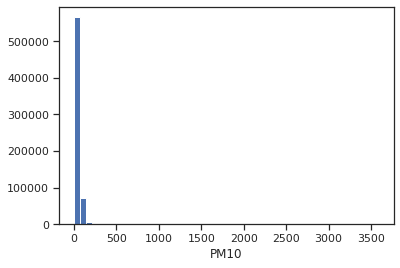

In [15]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [16]:
# Фильтр по пустым значениям поля MasVnrArea 
data[data['PM10'].isnull()]

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
33421,2017-11-10 04:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.004,0.057,0.002,0.8,NaN,29.0
33422,2017-11-10 05:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.004,0.059,0.002,0.8,NaN,29.0
33423,2017-11-10 06:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.005,0.065,0.002,1.0,NaN,30.0
33424,2017-11-10 07:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.005,0.065,0.002,0.9,NaN,29.0
33425,2017-11-10 08:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.006,0.070,0.003,1.2,NaN,36.0
33426,2017-11-10 09:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.006,0.071,0.002,1.2,NaN,34.0
33427,2017-11-10 10:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.006,0.073,0.004,1.0,NaN,37.0
33428,2017-11-10 11:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.005,0.045,0.017,0.7,NaN,26.0
33429,2017-11-10 12:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.005,0.039,0.022,0.6,NaN,28.0
33430,2017-11-10 13:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.004,0.029,0.028,0.5,NaN,20.0


In [17]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['PM10'].isnull()].index
flt_index

Int64Index([33421, 33422, 33423, 33424, 33425, 33426, 33427, 33428, 33429,
            33430,
            ...
            33740, 33741, 33742, 33743, 33744, 33745, 33746, 33747, 33748,
            33749],
           dtype='int64', length=329)

In [18]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
33421,2017-11-10 04:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.004,0.057,0.002,0.8,NaN,29.0
33422,2017-11-10 05:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.004,0.059,0.002,0.8,NaN,29.0
33423,2017-11-10 06:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.005,0.065,0.002,1.0,NaN,30.0
33424,2017-11-10 07:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.005,0.065,0.002,0.9,NaN,29.0
33425,2017-11-10 08:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.006,0.070,0.003,1.2,NaN,36.0
33426,2017-11-10 09:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.006,0.071,0.002,1.2,NaN,34.0
33427,2017-11-10 10:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.006,0.073,0.004,1.0,NaN,37.0
33428,2017-11-10 11:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.005,0.045,0.017,0.7,NaN,26.0
33429,2017-11-10 12:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.005,0.039,0.022,0.6,NaN,28.0
33430,2017-11-10 13:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.004,0.029,0.028,0.5,NaN,20.0


In [19]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['PM10']

33421   NaN
33422   NaN
33423   NaN
33424   NaN
33425   NaN
33426   NaN
33427   NaN
33428   NaN
33429   NaN
33430   NaN
33431   NaN
33432   NaN
33433   NaN
33434   NaN
33435   NaN
33436   NaN
33437   NaN
33438   NaN
33439   NaN
33440   NaN
33441   NaN
33442   NaN
33443   NaN
33444   NaN
33445   NaN
33446   NaN
33447   NaN
33448   NaN
33449   NaN
33450   NaN
         ..
33720   NaN
33721   NaN
33722   NaN
33723   NaN
33724   NaN
33725   NaN
33726   NaN
33727   NaN
33728   NaN
33729   NaN
33730   NaN
33731   NaN
33732   NaN
33733   NaN
33734   NaN
33735   NaN
33736   NaN
33737   NaN
33738   NaN
33739   NaN
33740   NaN
33741   NaN
33742   NaN
33743   NaN
33744   NaN
33745   NaN
33746   NaN
33747   NaN
33748   NaN
33749   NaN
Name: PM10, Length: 329, dtype: float64

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html#impute

In [20]:
data_num_PM10 = data_num[['PM10']]
data_num_PM10.head()

,PM10
0,73.0
1,71.0
2,70.0
3,70.0
4,69.0


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [22]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_PM10)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

С помощью класса [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) можно проводить импьютацию различными [показателями центра распределения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F)

In [23]:
strategies=['mean', 'median','most_frequent']

In [24]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_PM10)
    return data_num_imp[mask_missing_values_only]

In [25]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([43.71126206, 43.71126206, 43.71126206, 43.71126206, 43.71126206,
        43.71126206, 43.71126206, 43.71126206, 43.71126206, 43.71126206,
        43.71126206, 43.71126206, 43.71126206, 43.71126206, 43.71126206,
        43.71126206, 43.71126206, 43.71126206, 43.71126206, 43.71126206,
        43.71126206, 43.71126206, 43.71126206, 43.71126206, 43.71126206,
        43.71126206, 43.71126206, 43.71126206, 43.71126206, 43.71126206,
        43.71126206, 43.71126206, 43.71126206, 43.71126206, 43.71126206,
        43.71126206, 43.71126206, 43.71126206, 43.71126206, 43.71126206,
        43.71126206, 43.71126206, 43.71126206, 43.71126206, 43.71126206,
        43.71126206, 43.71126206, 43.71126206, 43.71126206, 43.71126206,
        43.71126206, 43.71126206, 43.71126206, 43.71126206, 43.71126206,
        43.71126206, 43.71126206, 43.71126206, 43.71126206, 43.71126206,
        43.71126206, 43.71126206, 43.71126206, 43.71126206, 43.71126206,
        43.71126206, 43.71126206, 43.71126

In [26]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 35., 35., 35., 35., 35

In [27]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
        27., 27., 27., 27., 27., 

In [28]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [29]:
data[['PM10']].describe()

,PM10
count,647182.000000
mean,43.711262
std,71.153913
min,-1.000000
25%,22.000000
50%,35.000000
75%,53.000000
max,3586.000000


In [30]:
test_num_impute_col(data, 'PM10', strategies[0])

('PM10', 'mean', 329, 43.711262056114045, 43.711262056114045)

In [31]:
test_num_impute_col(data, 'PM10', strategies[1])

('PM10', 'median', 329, 35.0, 35.0)

In [32]:
test_num_impute_col(data, 'PM10', strategies[2])

('PM10', 'most_frequent', 329, 27.0, 27.0)

### 1.2.2. Обработка пропусков в категориальных данных

Для обработки пропусков в категоральных данных будем исопльзовать другой датасет (battles.csv), содержащий информацию о битвах из серии книг "Песнь льда и пламени" (Сериал "Игра престолов")

In [35]:
# Будем использовать только обучающую выборку
data = pd.read_csv('battles.csv', sep=",")

In [60]:
data.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,defender_1,attacker_outcome,battle_type,attacker_commander,summer,location,region
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,Tully,1,pitched battle,Jaime Lannister,1.0,Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,Baratheon,1,ambush,Gregor Clegane,1.0,Mummer's Ford,The Riverlands
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,Tully,1,pitched battle,"Jaime Lannister, Andros Brax",1.0,Riverrun,The Riverlands
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,Lannister,0,pitched battle,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...",1.0,Green Fork,The Riverlands
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,Lannister,1,ambush,"Robb Stark, Brynden Tully",1.0,Whispering Wood,The Riverlands


In [36]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка attacker_king. Тип данных object. Количество пустых значений 2, 0.0%.
Колонка defender_king. Тип данных object. Количество пустых значений 3, 0.0%.
Колонка attacker_2. Тип данных object. Количество пустых значений 28, 0.0%.
Колонка defender_1. Тип данных object. Количество пустых значений 1, 0.0%.
Колонка battle_type. Тип данных object. Количество пустых значений 18, 0.0%.
Колонка attacker_commander. Тип данных object. Количество пустых значений 1, 0.0%.
Колонка location. Тип данных object. Количество пустых значений 1, 0.0%.


### Какие из этих колонок Вы бы выбрали или не выбрали для построения модели?

Для категориальных признаков со стратегиями "most_frequent" или "constant", будем использовать класс SimpleImputer.

In [37]:
cat_temp_data = data[['battle_type']]
cat_temp_data.head()

,battle_type
0,pitched battle
1,ambush
2,pitched battle
3,pitched battle
4,ambush


In [38]:
cat_temp_data['battle_type'].unique()

array(['pitched battle', 'ambush', 'siege', nan, 'razing'], dtype=object)

In [39]:
cat_temp_data[cat_temp_data['battle_type'].isnull()].shape

(18, 1)

In [40]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['pitched battle'],
       ['ambush'],
       ['pitched battle'],
       ['pitched battle'],
       ['ambush'],
       ['ambush'],
       ['pitched battle'],
       ['pitched battle'],
       ['siege'],
       ['ambush'],
       ['pitched battle'],
       ['ambush'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['pitched battle'],
       ['razing'],
       ['siege'],
       ['siege'],
       ['siege'],
       ['siege']], dtype=object)

In [41]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['ambush', 'pitched battle', 'razing', 'siege'], dtype=object)

In [42]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['pitched battle'],
       ['ambush'],
       ['pitched battle'],
       ['pitched battle'],
       ['ambush'],
       ['ambush'],
       ['pitched battle'],
       ['pitched battle'],
       ['siege'],
       ['ambush'],
       ['pitched battle'],
       ['ambush'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['!!!'],
       ['pitched battle'],
       ['pitched battle'],
       ['razing'],
       ['siege'],
       ['siege'],
       ['siege'],
       ['siege']], dtype=object)

In [43]:
np.unique(data_imp3)

array(['!!!', 'ambush', 'pitched battle', 'razing', 'siege'], dtype=object)

In [44]:
data_imp3[data_imp3=='!!!'].size

18

# 2. Преобразование категориальных признаков в числовые

In [45]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,pitched battle
1,ambush
2,pitched battle
3,pitched battle
4,ambush
5,ambush
6,pitched battle
7,pitched battle
8,siege
9,ambush


## 2.1. Кодирование категорий целочисленными значениями - [label encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [46]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [47]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [48]:
cat_enc['c1'].unique()

array(['pitched battle', 'ambush', 'siege', 'razing'], dtype=object)

In [49]:
np.unique(cat_enc_le)

array([0, 1, 2, 3])

In [50]:
le.inverse_transform([0, 1, 2, 3])

array(['ambush', 'pitched battle', 'razing', 'siege'], dtype=object)

## 2.2. Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [51]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [52]:
cat_enc.shape

(37, 1)

In [53]:
cat_enc_ohe.shape

(37, 4)

In [54]:
cat_enc_ohe

<37x4 sparse matrix of type '<class 'numpy.float64'>'
	with 37 stored elements in Compressed Sparse Row format>

In [55]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.]])

In [56]:
cat_enc.head(10)

,c1
0,pitched battle
1,ambush
2,pitched battle
3,pitched battle
4,ambush
5,ambush
6,pitched battle
7,pitched battle
8,siege
9,ambush


## 2.3. [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) - быстрый вариант one-hot кодирования

In [57]:
pd.get_dummies(cat_enc).head()

,c1_ambush,c1_pitched battle,c1_razing,c1_siege
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [58]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,battle_type_ambush,battle_type_pitched battle,battle_type_razing,battle_type_siege,battle_type_nan
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


# 3. Масштабирование данных

Термины "масштабирование" и "нормализация" часто используются как синонимы. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два подхода:
- MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

В этом случае значения лежат в диапазоне от 0 до 1.
- Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0):
$$ x_{новый} = \frac{x_{старый} - AVG(X) }{\sigma(X)} $$

В этом случае большинство значений попадает в диапазон от -3 до 3.

где $X$ - матрица объект-признак, $AVG(X)$ - среднее значение, $\sigma$ - среднеквадратичное отклонение.

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## 3.1. [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

Для минимаксного масштабирования будем использовать датасет, уже рассматриваемый ранее при обработке пропусков данных.

In [67]:
data = pd.read_csv('Measurement_summary.csv', sep=",")
data.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [68]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['PM2.5']])

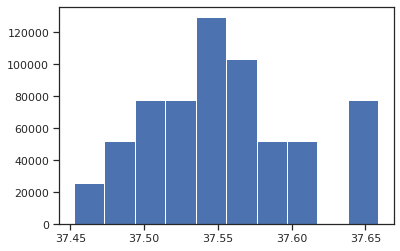

In [76]:
plt.hist(data['Latitude'], 10)
plt.show()

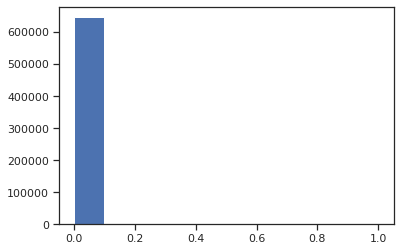

In [77]:
plt.hist(sc1_data, 10)
plt.show()

## 3.2. Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [81]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Latitude']])

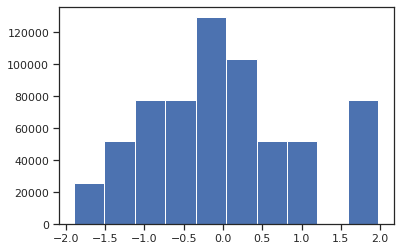

In [82]:
plt.hist(sc2_data, 10)
plt.show()

## 3.3. [Нормализация данных](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

In [83]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Latitude']])

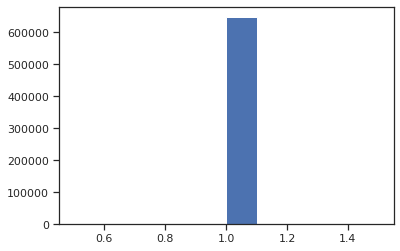

In [84]:
plt.hist(sc3_data, 10)
plt.show()